In [1]:
!pip install gensim

In [2]:
from gensim.models import Word2Vec

In [3]:
sentences = ["The quick brown fox jumps over the lazy dog.",
             "I like eating apples and bananas.",
             "NLP is a fascinating field."]

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
final_data = []
for sent in sentences:
    final_data.append(word_tokenize(sent))

In [6]:
final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['NLP', 'is', 'a', 'fascinating', 'field', '.']]

In [7]:
# Create the object

model = Word2Vec(sentences=final_data, min_count=1, vector_size=10)

'''
 Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 
sentences : The `sentences` iterable can be simply a list of lists of tokens, but for larger corpora, consider an iterable that streams the sentences directly from disk/network.
vector_size : Dimensionality of the word vectors.
min_count :Ignores all words with total frequency lower than this.
'''

'\n Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)\n \nsentences : The `sentences` iterable can be simply a list of lists of tokens, but for larger corpora, consider an iterable that streams the sentences directly from disk/network.\nvector_size : Dimensionality of the word vectors.\nmin_count :Ignores all words with total frequency lower than this.\n'

In [8]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=100

In [9]:
model.wv['apples'] # wv: This object essentially contains the mapping between words and embeddings (Word Vectors).

array([ 0.07898068, -0.06989504, -0.09155865, -0.00355753, -0.03099841,
        0.07894317,  0.05938574, -0.01545663,  0.01510963,  0.01790041],
      dtype=float32)

In [10]:
model.wv['strawberry'] # If word is not there then it will be giv KeyError; We can define Error Handling over here

KeyError: "Key 'strawberry' not present"

In [11]:
def get_embedding(word):
    try:
        word_embedding  = model.wv[word]
        print(f"Word Embedding for '{word}': {word_embedding}")
    except KeyError:
        print(f"Word {word} not found in the vocabulary")

In [12]:
get_embedding('apples')

Word Embedding for 'apples': [ 0.07898068 -0.06989504 -0.09155865 -0.00355753 -0.03099841  0.07894317
  0.05938574 -0.01545663  0.01510963  0.01790041]


In [13]:
get_embedding('strawberry')

Word strawberry not found in the vocabulary


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
print('Cosine Similarity: ',cosine_similarity(model.wv['apples'].reshape(1, -1), model.wv['bananas'].reshape(1, -1)))

Cosine Similarity:  [[0.18977958]]


In [16]:
print('Cosine Similarity: ',cosine_similarity(model.wv['fox'].reshape(1, -1), model.wv['dog'].reshape(1, -1)))

Cosine Similarity:  [[0.04266545]]


In [17]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to C:\Users\Administrator.DAI-
[nltk_data]     PC2\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [18]:
from nltk.corpus import abc

In [19]:
sents = abc.sents()

In [20]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [21]:
len(sents)

29059

In [22]:
model = Word2Vec(sentences=sents, min_count=1, vector_size=10)

In [23]:
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [24]:
len(model.wv.key_to_index)

31885

In [25]:
data = model.wv.most_similar('science')
print(data)

[('authority', 0.9830335974693298), ('capitalise', 0.974468469619751), ('Dubbo', 0.9722074270248413), ('arousal', 0.9707878828048706), ('Hofmann', 0.9698465466499329), ('leading', 0.9696537852287292), ('Women', 0.9653964042663574), ('nurse', 0.9650985598564148), ('bulk', 0.9643478989601135), ('publisher', 0.9623260498046875)]


In [26]:
data = model.wv.most_similar('publisher')
print(data)

[('science', 0.9623261094093323), ('Dubbo', 0.9571259021759033), ('slash', 0.9568957686424255), ('earth', 0.9566171169281006), ('tanning', 0.9548292756080627), ('eliminating', 0.954751193523407), ('Parkinson', 0.9521591663360596), ('glands', 0.9511147737503052), ('capitalise', 0.9486129879951477), ('triple', 0.9482685923576355)]


In [27]:
model.wv['science'], model.wv['publisher']

(array([ 0.13915694,  0.14421116,  2.3037782 ,  0.05456614, -0.36682937,
        -0.6110415 ,  1.7266773 ,  1.1274914 , -1.3810319 , -0.40295982],
       dtype=float32),
 array([-0.0005124 , -0.01233845,  0.21713193,  0.02553322, -0.0815106 ,
        -0.07379902,  0.1601144 ,  0.04759355, -0.1612315 , -0.0614171 ],
       dtype=float32))

### Reading the data and Train the Word2Vec

In [28]:
import json

with open('intents.json', 'r') as f:
    data = json.load(f)

In [29]:
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [30]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [31]:
data[0]['patterns']

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [32]:
data[0]['responses']

['Hello, thanks for contacting us',
 'Good to see you here',
 ' Hi there, how may I assist you?']

In [33]:
import pandas as pd

In [34]:
df =pd.DataFrame(data)
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [35]:
df['patterns'][2]

['Thanks for helping me',
 'Thank your guidance',
 "That's helpful and kind from you"]

In [36]:
df['patterns'] = df['patterns'].apply(', '.join)
df

,tag,patterns,responses
0,welcome,"Hi, How are you, Is any one to talk?, Hello, h...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"Bye, See you later, Goodbye, I will come back ...","[See you later, thanks for visiting, have a gr..."
2,thankful,"Thanks for helping me, Thank your guidance, Th...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"What hours are you open?, Tell your opening ti...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"Can I pay using credit card?, Can I pay using...","[We accept VISA, Mastercard and credit card, W..."


In [37]:
from nltk.corpus import stopwords
from textblob import Word
import string

stop = stopwords.words('english')

df['patterns'] = df.patterns.apply(lambda x: ' '.join(x.lower() for x in word_tokenize(x)))

df['patterns'] = df.patterns.apply(lambda x: ' '.join(x for x in word_tokenize(x) if x not in string.punctuation))

df.patterns = df.patterns.str.replace('[^\w\s]','') # \w: one word characters and \s: whitespace characters (Space, Tabs or New Lines)

df.patterns = df.patterns.apply(lambda x: ' '.join(x for x in word_tokenize(x) if not x.isdigit()))

df.patterns = df.patterns.apply(lambda x: ' '.join(x for x in word_tokenize(x) if not x in stop))

df.patterns = df.patterns.apply(lambda x: ' '.join([Word(word).lemmatize() for word in word_tokenize(x)]))

C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_22248\741251678.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df.patterns = df.patterns.str.replace('[^\w\s]','') # \w: one word characters and \s: whitespace characters (Space, Tabs or New Lines)


In [38]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thanks helping thank guidance helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hour open tell opening time open timing please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay using credit card pay using mastercard pay...,"[We accept VISA, Mastercard and credit card, W..."


In [39]:
w = Word('playing')

In [40]:
w.lemmatize(pos='v')

'play'

In [41]:
w.stem()

'play'

In [42]:
bigger_list = []
for i in df.patterns:
    li = i.split()
    bigger_list.append(li)

In [43]:
bigger_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thanks', 'helping', 'thank', 'guidance', 'helpful', 'kind'],
 ['hour', 'open', 'tell', 'opening', 'time', 'open', 'timing', 'please'],
 ['pay',
  'using',
  'credit',
  'card',
  'pay',
  'using',
  'mastercard',
  'pay',
  'using',
  'cash']]

In [44]:
model = Word2Vec(sentences=bigger_list, min_count=1, vector_size=2)

In [45]:
model

In [46]:
model.wv['hello']

array([-0.04732007,  0.28842866], dtype=float32)

In [47]:
model.wv['hi']

array([-0.4651475 , -0.35584044], dtype=float32)

In [48]:
model.wv.key_to_index.keys()

dict_keys(['using', 'pay', 'hi', 'open', 'later', 'soon', 'back', 'come', 'goodbye', 'bye', 'see', 'helping', 'available', 'hello', 'talk', 'one', 'thanks', 'cash', 'thank', 'mastercard', 'helpful', 'kind', 'hour', 'tell', 'opening', 'time', 'timing', 'please', 'credit', 'card', 'guidance'])

In [49]:
words = list(model.wv.key_to_index.keys())
words

['using',
 'pay',
 'hi',
 'open',
 'later',
 'soon',
 'back',
 'come',
 'goodbye',
 'bye',
 'see',
 'helping',
 'available',
 'hello',
 'talk',
 'one',
 'thanks',
 'cash',
 'thank',
 'mastercard',
 'helpful',
 'kind',
 'hour',
 'tell',
 'opening',
 'time',
 'timing',
 'please',
 'credit',
 'card',
 'guidance']

In [50]:
for i in words:
    print(model.wv[i])

[-0.02742577  0.01346433]
[0.2555327  0.45100027]
[-0.4651475  -0.35584044]
[0.32262293 0.44906297]
[-0.2507714  -0.18816859]
[ 0.36868715 -0.07650963]
[-0.22684215  0.32782722]
[-0.24316008 -0.09053693]
[0.14382899 0.04959369]
[-0.41434813 -0.47201467]
[0.36533725 0.25377202]
[0.33787447 0.03814653]
[ 0.31754452 -0.1702683 ]
[-0.04732007  0.28842866]
[-0.37608188 -0.19680518]
[-0.37557912 -0.04650211]
[ 0.47683272 -0.36592016]
[-0.11655561 -0.09598752]
[ 0.40387183 -0.2965448 ]
[ 0.00225812 -0.2376867 ]
[-0.48017752  0.25036466]
[-0.43797928 -0.21959126]
[-0.00191884 -0.01451608]
[-0.38315234  0.4809942 ]
[0.24909788 0.4619492 ]
[-0.40820828  0.22501262]
[-0.20682515  0.04133657]
[ 0.424931   -0.22310883]
[ 0.22587502 -0.33934802]
[-0.17752053  0.46994656]
[-0.07890444  0.01607508]


In [51]:
x=[]
y=[]

for i in words:
    x.append(model.wv[i][0])
    y.append(model.wv[i][1])

In [52]:
a = pd.DataFrame({'x': x, 'y':y})
a

,x,y
0,-0.027426,0.013464
1,0.255533,0.451000
2,-0.465147,-0.355840
3,0.322623,0.449063
4,-0.250771,-0.188169
5,0.368687,-0.076510
6,-0.226842,0.327827
7,-0.243160,-0.090537
8,0.143829,0.049594
9,-0.414348,-0.472015


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1500x1000 with 0 Axes>

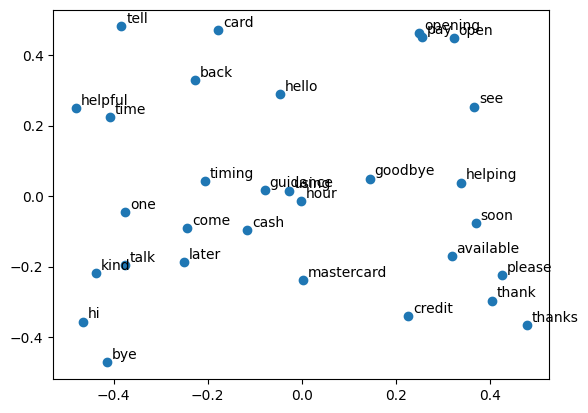

In [54]:
plt.figure(figsize=(15,10))
fig, ax = plt.subplots()

ax.scatter(x, y)

for i, label in enumerate(words):
    ax.annotate(label, (x[i]+0.01, y[i]+0.01))

plt.show()

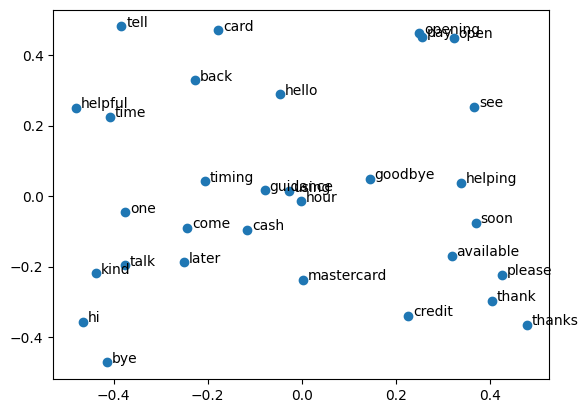

In [55]:
# Method in Class by Tushar Sir

vectors = []
for word in words:
    vect = model.wv[word]
    vectors.append(list(vect))
    
vectors = pd.DataFrame(vectors, columns=['x','y'])
vectors;

plt.scatter(vectors['x'], vectors['y'])

for i in range(len(words)):
    plt.annotate(xy=(vectors.loc[i,'x']+0.01, vectors.loc[i,'y']), text = words[i])

In [56]:
print('Cosine Similarity: ',cosine_similarity(model.wv['tell'].reshape(1, -1), model.wv['mastercard'].reshape(1, -1)))

Cosine Similarity:  [[-0.7880542]]


In [60]:
# Find the top-N most similar keys. Positive keys contribute positively towards the similarity, negative keys negatively.

model.wv.most_similar('mastercard', topn=5)

[('hour', 0.9900864958763123),
 ('credit', 0.8376805186271667),
 ('bye', 0.7452210187911987),
 ('cash', 0.6283474564552307),
 ('thanks', 0.6163056492805481)]

In [61]:
dissimilar_words = model.wv.doesnt_match('''see you later, thanks for visiting'''.split()) # Which key from the given list doesn't go with the others?
dissimilar_words

'see'